# Exercises on understanding rates of change

## Exercise 8.1

Suppose you start a road trip at noon when your odometer reads 77,641 miles, and you end your road trip at 4:30 in the afternoon with your odometer reading 77,905 miles. What was your average speed during the trip?

The speed measures the rate of change of the distance over the time. Therefore, the average speed can be written as:

$
avg\_speed = \frac{d(t2) - d(t1)}{t2 - t1}
$

In our case:

$
t1 = 12 hr \\
t2 = 16.5 hr \\
d(t1) = 77641 miles \\
d(t2) = 77905 miles \\
avg\_speed = \frac{77905 - 77641}{16.5 - 12} \frac{miles}{hr}
$

In [2]:
avg_speed = (77905 - 77641)/(16.5 -12)

print('avg_speed={} miles/hr'.format(avg_speed))

avg_speed=58.666666666666664 miles/hr


## Exercise 8.2

Write a Python function `secant_line(f, x1, x2)` that takes a function `f(x)` and two values `x1` and `x2` and that returns a new function representing a secant line over time.

For instance, if you ran `line = secant_line(f, x1, x2)` would give you the `y` value of the secant line at `x=3`.

The secant line is the straight line that passes through $ (x1, f(x1)) $ and $ (x2, f(x2)) $.

We've seen in the concepts section that a straight line can be written as:

$
y = mx + n
$

where $ a $ is the slope of the straight line, and $ b $ the value for `f(0)`.

Therefore, algebraically:

$
\begin{cases}
f(x1) = mx1 + n \\
f(x2) = mx2 + n
\end{cases} \Rightarrow
\begin{cases}
m = \frac{f(x2) - f(x1)}{x2 - x1} \\
n = \frac{x2 f(x1) - x1 f(x2)}{x2 - x1}
\end{cases}
$

Therefore, the secant line function can be written as:

$
y = \frac{f(x2) - f(x1)}{x2 - x1} \cdot x + \frac{x2 f(x1) - x1 f(x2)}{x2 - x1}
$

3.3
5.253125
3.3
5.253125


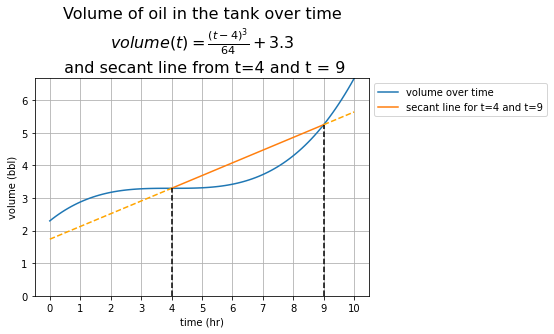

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def v(t):
    return (t - 4) ** 3 / 64 + 3.3

secant_point_start = (4, v(4))
secant_point_end = (9, v(9))

def secant_line(f, x1, x2):
    def new_function(x):
        return ((f(x2) - f(x1))/(x2 - x1)) * x + (x2 * f(x1) - x1 * f(x2))/(x2 - x1)
    return new_function

secant_fn = secant_line(v, 4, 9)

print(secant_fn(4))
print(secant_fn(9))
print(v(4))
print(v(9))


fig, ax = plt.subplots()

plt.title(
    'Volume of oil in the tank over time\n'
    r'$ volume(t) = \frac{(t - 4)^3}{64} + 3.3 $' 
    '\n and secant line from t=4 and t = 9', fontsize=16)

plt.ylim(0, v(10))
plt.xticks(np.arange(0, 11, step=1))

# plotting the volume
ts = np.linspace(0, 10, 100)
plt.plot(ts, v(ts), label='volume over time')

ts = np.linspace(4, 9, 100)
plt.plot(ts, secant_fn(ts), label='secant line for t=4 and t=9')

# this is just styling
ts = np.linspace(0, 4, 100)
plt.plot(ts, secant_fn(ts), color='orange', linestyle='dashed')
ts = np.linspace(9, 10, 100)
plt.plot(ts, secant_fn(ts), color='orange', linestyle='dashed')
vs = np.linspace(0, v(4))
ts = 4 * np.ones(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')
vs = np.linspace(0, v(9))
ts = 9 * np.ones(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')


plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Exercise 8.3

Write a function that uses the code from the previous exercise to plot a secant line of a function f between two given points.

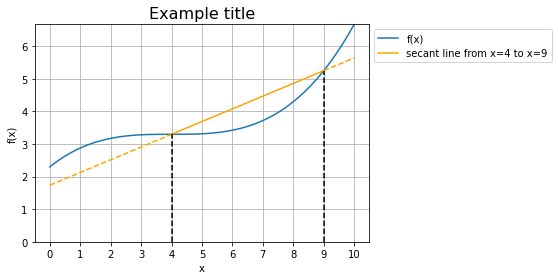

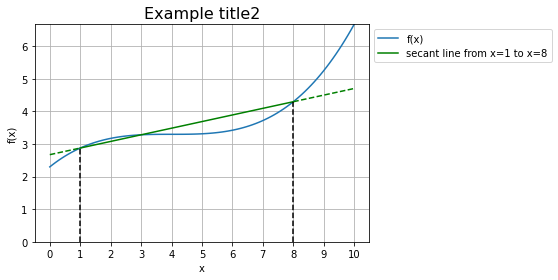

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import secant_line

def v(t):
    return (t - 4) ** 3 / 64 + 3.3

def plot_secant(f, x1, x2, color='k', title=None, xmin=0, xmax=10, ymin=0, ymax=10):
    secant_point_start = (x1, f(x1))
    secant_point_end = (x2, f(x2))

    secant_fn = secant_line(f, x1, x2)

    fig, ax = plt.subplots()

    if title:
        plt.title(title, fontsize=16)

    plt.ylim(ymin, ymax)
    plt.xticks(np.arange(xmin, xmax + 1, step=1))

    # plotting the function
    xs = np.linspace(xmin, xmax, 100)
    plt.plot(xs, [f(x) for x in xs], label='f(x)')

    xs = np.linspace(x1, x2, 100)
    plt.plot(xs, secant_fn(xs), label='secant line from x={} to x={}'.format(x1, x2), color=color)

    # this is just styling
    xs = np.linspace(xmin, x1, 100)
    plt.plot(xs, secant_fn(xs), color=color, linestyle='dashed')
    xs = np.linspace(x2, xmax, 100)
    plt.plot(xs, secant_fn(xs), color=color, linestyle='dashed')
    ys = np.linspace(0, f(x1))
    xs = x1 * np.ones(len(ys))
    plt.plot(xs, ys, color='black', linestyle='dashed')
    ys = np.linspace(0, f(x2))
    xs = x2 * np.ones(len(vs))
    plt.plot(xs, ys, color='black', linestyle='dashed')


    plt.xlabel(r'x')
    plt.ylabel(r'f(x)')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

plot_secant(v, 4, 9, color='orange', title='Example title', xmin=0, xmax=10, ymin=0, ymax=v(10))

plot_secant(v, 1, 8, color='green', title='Example title2', xmin=0, xmax=10, ymin=0, ymax=v(10))    

## Exercise 8.4

Plot the decreasing_volume flow rates over time at 0.5 hour intervals. When is its flow rate at the lowest? That is, when is oil leaving the tank at the fastest rate?

In [ ]:
We can jump straight-ahead into the scatter plot:

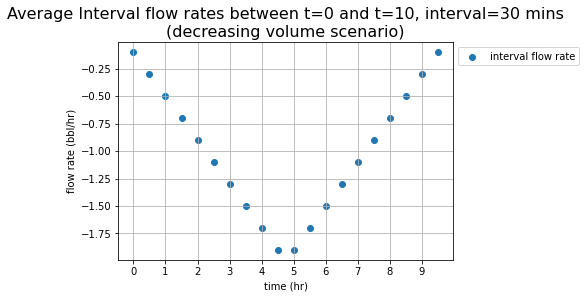

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import interval_average_rates

def v(t):
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

# Plot
fig, ax = plt.subplots()

plt.title(
    'Average Interval flow rates between t=0 and t=10, interval=30 mins\n'
    '(decreasing volume scenario)', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the interval flow rate as a scatter plot
series = interval_average_rates(v, 0, 10, 0.5)
times = [t for (t, _) in series]
rates = [r for (_, r) in series]
plt.scatter(times, rates, label='interval flow rate')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

The flow is at its lowest close to the 5 hour mark. Around that time, close to 2 barrels/hour were leaving the tank.

## Exercise 8.5

Write a volume function that is linear (for example $v(t) = 5t + 4 $ ) and plot the flow rate over time to show that it is constant.

In this exercise we try to demonstrate that if the volume function is linear in the form $ y = mx + n $, then the rate of change would be constant (no matter the value of the coefficients $ m $ and $ n $).

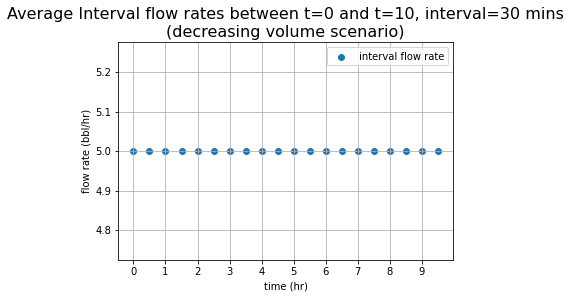

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import interval_average_rates

def v(t):
    return 5 * t + 3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Average Interval flow rates between t=0 and t=10, interval=30 mins\n'
    '(volume being a linear function)', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the interval flow rate as a scatter plot
series = interval_average_rates(v, 0, 10, 0.5)
times = [t for (t, _) in series]
rates = [r for (_, r) in series]
plt.scatter(times, rates, label='interval flow rate')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

That is to be expected, as the the volume is a straight line and therefore, the slope values of the secants for whichever two points that are selected are always the same.

## Exercises 8.6

Confirm that the graph of the volume function is not a straight line on the interval `0.999` to `1.001`.


Geometrically, if the volume function between `0.999` and `1.001` were a straight line, the secant line at every point would be the same as the volume function.

In [3]:
from my_linear_equations import secant_line


def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

print('volume(1)={}'.format(volume(1)))
print('secant_line(0.999, 1.001)(1)={}'.format(secant_line(volume, 0.999, 1.001)(1)))

volume(1)=2.878125
secant_line(0.999, 1.001)(1)=2.8781248593749327


We see that it has a different value, and therefore, it is not straight.

## Exercise 8.7

Approximate the slope of a tangent line to the graph at $ t = 8 $ by computing the slopes of smaller and smaller secant lines around $ t = 8 $.

We can leverage on the function we've defined in our lib `average_rate_of_change(...)` and manually partition the interval around `t=8`.

Then to validate it, we can run our `instantaneous_rate_of_change(..)` function and check it gives us the same value.

In [1]:
from my_linear_equations import average_rate_of_change, instantaneous_rate_of_change

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

print('average_rate_of_change(volume, 7.9, 8.1)={}'.format(average_rate_of_change(volume, 7.9, 8.1)))
print('average_rate_of_change(volume, 7.99, 8.01)={}'.format(average_rate_of_change(volume, 7.99, 8.01)))
print('average_rate_of_change(volume, 7.999, 8.001)={}'.format(average_rate_of_change(volume, 7.999, 8.001)))

print('instantaneous_rate_of_change(volume, 8)={}'.format(instantaneous_rate_of_change(volume, 8)))

average_rate_of_change(volume, 7.9, 8.1)=0.7501562500000007
average_rate_of_change(volume, 7.99, 8.01)=0.750001562499996
average_rate_of_change(volume, 7.999, 8.001)=0.7500000156249458
instantaneous_rate_of_change(volume, 8)=0.75


Therefore, the approximation of the tangent line at $ t = 8 $, seems to converge around $ 0.75 $.

## Exercise 8.8

For the `sign(x)` function defined in Python as:

```python
def sign(x):
    return x / abs(x)
```

convince yourself that it doesn't have a derivative at x = 0.

For the given function to have a derivative, we have to see that the `average_rate_of_change(...)` in smaller intervals around the given point $ x = 0 $ does not converge.

In [8]:
from my_linear_equations import average_rate_of_change

def sign(x):
    return x / abs(x)

print('average_rate_of_change(sign, -1, 1)={}'.format(average_rate_of_change(sign, -1, 1)))
print('average_rate_of_change(sign, -.5, .5)={}'.format(average_rate_of_change(sign, -.5, .5)))
print('average_rate_of_change(sign, -.25, .25)={}'.format(average_rate_of_change(sign, -.25, .25)))
print('average_rate_of_change(sign, -.1, .1)={}'.format(average_rate_of_change(sign, -.1, .1)))
print('average_rate_of_change(sign, -.01, .01)={}'.format(average_rate_of_change(sign, -.01, .01)))

average_rate_of_change(sign, -1, 1)=1.0
average_rate_of_change(sign, -.5, .5)=2.0
average_rate_of_change(sign, -.25, .25)=4.0
average_rate_of_change(sign, -.1, .1)=10.0
average_rate_of_change(sign, -.01, .01)=100.0


So we see that the closer the interval gets to `0`, the larger the value becomes with compared with the previous one.

As a result, the `sign(x)` function does not have a derivative at `x=0`.

## Exercise 8.9

Approximately, how much oil is added to the tank in the first 6 hours? In the last 4 hours? During which time interval is more added?